In [23]:
#importing the necessary libraries
from keras.models import Model
from keras.layers import Input, Dense
from keras.callbacks import History
history = History()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Data Acquisition

In [24]:
# Data Acquisition

x_train=pd.read_csv("mnist_train.csv")
x_test=pd.read_csv("mnist_test.csv")

In [25]:
# Data Visulization
x_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Data Preprocessing

y_train = x_train.iloc[:,1].values
x_train = x_train.drop(["label"],axis=1)
y_test = x_test.iloc[:,1].values
x_test = x_test.drop(["label"],axis=1)

In [5]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
#Normalization
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [6]:
#spliting the train dataset into train and validation set
x_train,x_val,y_train,y_val= train_test_split(x_train,y_train,test_size = 0.2, random_state = 0)

In [7]:
print(f'x_train shape = {x_train.shape}')
print(f'x_test shape = {x_test.shape}')
print(f'x_val shape = {x_val.shape}')

x_train shape = (48000, 784)
x_test shape = (10000, 784)
x_val shape = (12000, 784)


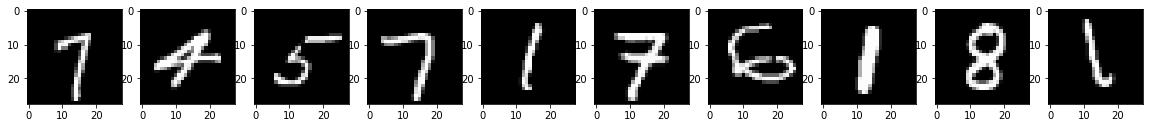

In [19]:
#Data Visualizaion
n = 10
plt.figure(figsize =(20,4))

for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_train[i].reshape(28,28))
    plt.gray()
plt.savefig('mnist.png')
plt.show()

# Model

In [9]:
#Builidg the simple auto encoder model
encoding_dim = 32
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

In [10]:
#model compilation and summary
autoencoder.compile(optimizer='adadelta', loss = 'binary_crossentropy', metrics = ['accuracy'])
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


# Fit Data

In [11]:
#Training the model
history = autoencoder.fit(x_train, x_train, epochs=100, batch_size = 256, shuffle = True,
              validation_data = (x_val,x_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 3s 61us/step - loss: 0.3863 - accuracy: 0.7367 - val_loss: 0.2751 - val_accuracy: 0.7948
Epoch 2/100
48000/48000 [==============================] - 2s 48us/step - loss: 0.2691 - accuracy: 0.7964 - val_loss: 0.2628 - val_accuracy: 0.7970
Epoch 3/100
48000/48000 [==============================] - 2s 49us/step - loss: 0.2544 - accuracy: 0.7978 - val_loss: 0.2449 - val_accuracy: 0.7969
Epoch 4/100
48000/48000 [==============================] - 2s 52us/step - loss: 0.2359 - accuracy: 0.7973 - val_loss: 0.2274 - val_accuracy: 0.7975
Epoch 5/100
48000/48000 [==============================] - 2s 49us/step - loss: 0.2200 - accuracy: 0.7976 - val_loss: 0.2134 - val_accuracy: 0.7964
Epoch 6/100
48000/48000 [==============================] - 2s 48us/step - loss: 0.2076 - accuracy: 0.7983 - val_loss: 0.2026 - val_accuracy: 0.7983
Epoch 7/100
48000/48000 [==============================] - 2s 

Epoch 56/100
48000/48000 [==============================] - 2s 45us/step - loss: 0.1058 - accuracy: 0.8133 - val_loss: 0.1058 - val_accuracy: 0.8130
Epoch 57/100
48000/48000 [==============================] - 2s 46us/step - loss: 0.1054 - accuracy: 0.8134 - val_loss: 0.1054 - val_accuracy: 0.8130
Epoch 58/100
48000/48000 [==============================] - 2s 46us/step - loss: 0.1051 - accuracy: 0.8134 - val_loss: 0.1051 - val_accuracy: 0.8131
Epoch 59/100
48000/48000 [==============================] - 2s 47us/step - loss: 0.1047 - accuracy: 0.8134 - val_loss: 0.1048 - val_accuracy: 0.8131
Epoch 60/100
48000/48000 [==============================] - 2s 51us/step - loss: 0.1044 - accuracy: 0.8135 - val_loss: 0.1044 - val_accuracy: 0.8131
Epoch 61/100
48000/48000 [==============================] - 2s 52us/step - loss: 0.1041 - accuracy: 0.8135 - val_loss: 0.1042 - val_accuracy: 0.8131
Epoch 62/100
48000/48000 [==============================] - 2s 46us/step - loss: 0.1038 - accuracy: 0.8135

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


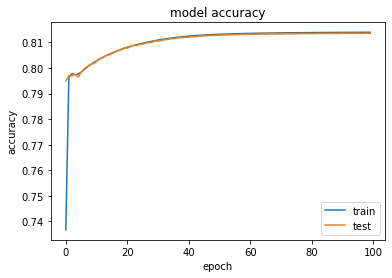

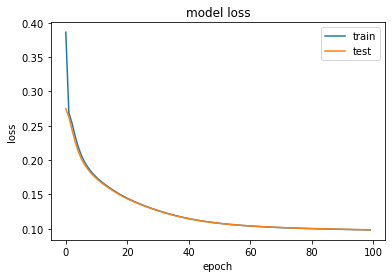

In [12]:
# Plot training loss and validation split loss over the epochs

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.savefig('sae_model_accuracy.png')
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('sae_model_loss.png')
plt.show()

In [13]:
# predicting on the test set
reconstructed_imgs = autoencoder.predict(x_test)
encoded_imgs = encoder.predict(x_test)

In [14]:
# Evalution of the model on the test set
evaluation = autoencoder.evaluate(x_test, x_test)

print("Loss:",evaluation[0])
print("Accuracy",evaluation[1]*100)

10000/10000 [==============================] - 1s 71us/step
Loss: 0.09686534833908081
Accuracy 81.29653930664062


In [15]:
#checkingthe encode images mean
encoded_imgs.mean()

8.377721

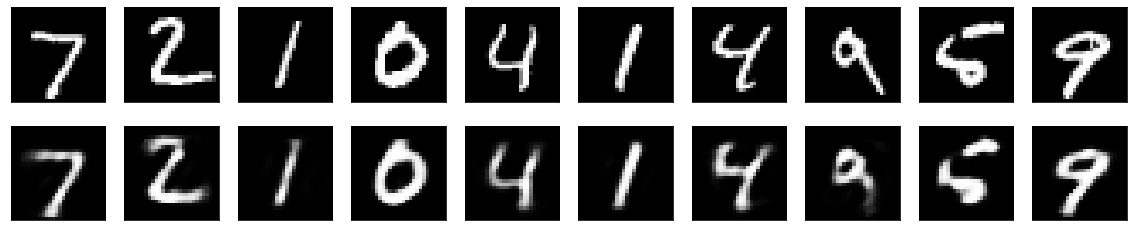

In [16]:
# Ploting the original input vs reconstructed output
n = 10
plt.figure(figsize =(20,4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2,n, i+1+n)
    plt.imshow(reconstructed_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()